In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
trainpath = "/content/Train"
testpath = "/content/Test"

In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255 , shear_range = 0.2 , zoom_range =0.2 , horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(trainpath , target_size = (120,120) , batch_size=32 , class_mode='categorical' , shuffle=True)
test_set = test_datagen.flow_from_directory(testpath , target_size=(120,120) , batch_size=32, class_mode = 'categorical', shuffle=False , seed = 4)

Found 61200 images belonging to 36 classes.
Found 10800 images belonging to 36 classes.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [29]:
model = Sequential()
model.add(Conv2D(filters = 32 , kernel_size=(3 , 3),  padding="same", input_shape=(120,120,3), activation='relu'))
model.add(Conv2D(filters=32 , kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


model.add(Flatten())
model.add(Dense(units= 256,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=200,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units= 36, activation="softmax"))



model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics =['accuracy'])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 120, 120, 32)      896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 120, 120, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 60, 60, 32)        9248      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 30, 30, 32)       

In [31]:
 history = model.fit(training_set, steps_per_epoch = 50, epochs = 200, validation_data = test_set, validation_steps = 25 )

Epoch 1/200
50/50 [==============================] - 8s 127ms/step - loss: 3.5858 - accuracy: 0.0211 - val_loss: 3.5661 - val_accuracy: 0.0000e+00
Epoch 2/200
50/50 [==============================] - 6s 117ms/step - loss: 3.5312 - accuracy: 0.0507 - val_loss: 1.5165 - val_accuracy: 0.5500
Epoch 3/200
50/50 [==============================] - 6s 123ms/step - loss: 3.0151 - accuracy: 0.1685 - val_loss: 0.9199 - val_accuracy: 0.8062
Epoch 4/200
50/50 [==============================] - 6s 123ms/step - loss: 2.4055 - accuracy: 0.2906 - val_loss: 0.9098 - val_accuracy: 0.6700
Epoch 5/200
50/50 [==============================] - 6s 120ms/step - loss: 2.1213 - accuracy: 0.3570 - val_loss: 0.9688 - val_accuracy: 0.7175
Epoch 6/200
50/50 [==============================] - 6s 120ms/step - loss: 1.9170 - accuracy: 0.4447 - val_loss: 0.7634 - val_accuracy: 0.7588
Epoch 7/200
50/50 [==============================] - 6s 122ms/step - loss: 1.6564 - accuracy: 0.5053 - val_loss: 0.4808 - val_accuracy: 0.

In [44]:
model.fit(training_set, steps_per_epoch = 50, epochs = 50, validation_data = test_set, validation_steps = 25 )

Epoch 1/50
50/50 [==============================] - 6s 122ms/step - loss: 0.1833 - accuracy: 0.9337 - val_loss: 0.1371 - val_accuracy: 0.9600
Epoch 2/50
50/50 [==============================] - 6s 123ms/step - loss: 0.1996 - accuracy: 0.9337 - val_loss: 0.1370 - val_accuracy: 0.9650
Epoch 3/50
50/50 [==============================] - 6s 120ms/step - loss: 0.1887 - accuracy: 0.9444 - val_loss: 0.1153 - val_accuracy: 0.9700
Epoch 4/50
50/50 [==============================] - 6s 117ms/step - loss: 0.1478 - accuracy: 0.9444 - val_loss: 0.1114 - val_accuracy: 0.9663
Epoch 5/50
50/50 [==============================] - 6s 117ms/step - loss: 0.1997 - accuracy: 0.9369 - val_loss: 0.0639 - val_accuracy: 0.9800
Epoch 6/50
50/50 [==============================] - 6s 120ms/step - loss: 0.1830 - accuracy: 0.9438 - val_loss: 0.1133 - val_accuracy: 0.9638
Epoch 7/50
50/50 [==============================] - 6s 121ms/step - loss: 0.1939 - accuracy: 0.9413 - val_loss: 0.1559 - val_accuracy: 0.9575
Epoch 

In [45]:
def evaluate_model(model, generator, nBatches):
    score = model.evaluate_generator(generator=generator,               # Generator yielding tuples
                                     steps=generator.samples//nBatches, # number of steps (batches of samples) to yield from generator before stopping
                                     max_queue_size=10,                 # maximum size for the generator queue
                                     workers=1,                         # maximum number of processes to spin up when using process based threading
                                     use_multiprocessing=False,         # whether to use process-based threading
                                     verbose=0)
    print("loss: %.3f - acc: %.3f" % (score[0], score[1]))

In [46]:
evaluate_model(model , test_set, 32)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


loss: 0.098 - acc: 0.972


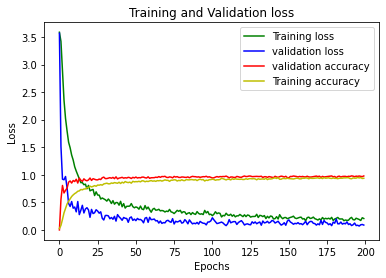

In [47]:
hist = history
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']
acc_val = hist.history['val_accuracy']
acc_train = hist.history['accuracy']
epochs = range(0,200)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.plot(epochs, acc_val, 'r', label='validation accuracy')
plt.plot(epochs, acc_train, 'y', label='Training accuracy')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
import os

In [49]:
label_map = (training_set.class_indices)
label_map

{'character_10_yna': 0,
 'character_11_taamatar': 1,
 'character_12_thaa': 2,
 'character_13_daa': 3,
 'character_14_dhaa': 4,
 'character_15_adna': 5,
 'character_16_tabala': 6,
 'character_17_tha': 7,
 'character_18_da': 8,
 'character_19_dha': 9,
 'character_1_ka': 10,
 'character_20_na': 11,
 'character_21_pa': 12,
 'character_22_pha': 13,
 'character_23_ba': 14,
 'character_24_bha': 15,
 'character_25_ma': 16,
 'character_26_yaw': 17,
 'character_27_ra': 18,
 'character_28_la': 19,
 'character_29_waw': 20,
 'character_2_kha': 21,
 'character_30_motosaw': 22,
 'character_31_petchiryakha': 23,
 'character_32_patalosaw': 24,
 'character_33_ha': 25,
 'character_34_chhya': 26,
 'character_35_tra': 27,
 'character_36_gya': 28,
 'character_3_ga': 29,
 'character_4_gha': 30,
 'character_5_kna': 31,
 'character_6_cha': 32,
 'character_7_chha': 33,
 'character_8_ja': 34,
 'character_9_jha': 35}

In [50]:
label_map = {'ञ': 0,
 'ट': 1,
 'ठ': 2,
 'ड': 3,
 'ढ': 4,
 'ण': 5,
 'त': 6,
 'थ': 7,
 'द': 8,
 'ध': 9,
 'क': 10,
 'न': 11,
 'प': 12,
 'फ': 13,
 'ब': 14,
 'भ': 15,
 'म': 16,
 'य': 17,
 'र': 18,
 'ल': 19,
 'व': 20,
 'ख': 21,
 'श': 22,
 'ष': 23,
 'स': 24,
 'ह': 25,
 'क्ष': 26,
 'त्र': 27,
 'ज्ञ': 28,
 'ग': 29,
 'घ': 30,
 'ड़': 31,
 'च': 32,
 'छ': 33,
 'ज': 34,
 'झ': 35}

In [51]:
labels = []
for key in label_map:
  labels.append(key)
labels

['ञ',
 'ट',
 'ठ',
 'ड',
 'ढ',
 'ण',
 'त',
 'थ',
 'द',
 'ध',
 'क',
 'न',
 'प',
 'फ',
 'ब',
 'भ',
 'म',
 'य',
 'र',
 'ल',
 'व',
 'ख',
 'श',
 'ष',
 'स',
 'ह',
 'क्ष',
 'त्र',
 'ज्ञ',
 'ग',
 'घ',
 'ड़',
 'च',
 'छ',
 'ज',
 'झ']

In [52]:
import keras
import cv2 as cv

In [53]:
model.save("/content/hindi_model.h5")

In [54]:
model = keras.models.load_model('/content/hindi_model.h5')

In [55]:
def convert(imgpath):
  # img = image.load_img(imgpath, target_size = (120,120,3))

  im = cv.imread(imgpath)
  imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
  ret, thresh = cv.threshold(imgray, 127, 255, 0)


  items = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
  contours = items[0] if len(items) == 2 else items[1]


  c = max(contours, key=cv.contourArea)

  extLeft = tuple(c[c[:, :, 0].argmin()][0])
  extRight = tuple(c[c[:, :, 0].argmax()][0])
  extTop = tuple(c[c[:, :, 1].argmin()][0])
  extBot = tuple(c[c[:, :, 1].argmax()][0])



  coords = [extLeft, extRight ,extTop ,extBot]
  xmin = 10000
  xmax = -1
  ymin = 10000
  ymax = -1

  for xy in coords:
      xmin = min(xmin, xy[0])
      xmax = max(xmax, xy[0])
      ymin = min(ymin, xy[1])
      ymax = max(ymax, xy[1])

  xmin = max(xmin-5, 0)
  ymin = max(ymin-5, 0)
  roi = im[ymin :ymax+5 ,xmin : xmax+5]

  image.save_img(r"extracted/final.png", roi)


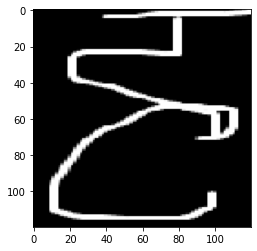

The image is ह




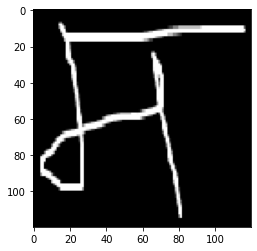

The image is म




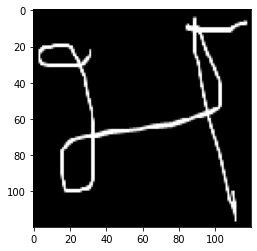

The image is भ




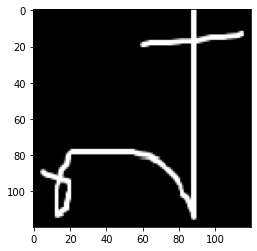

The image is च




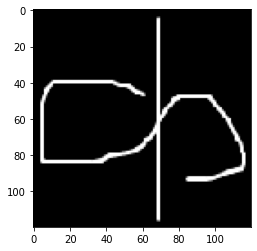

The image is क




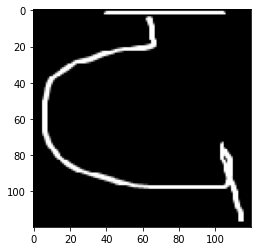

The image is द




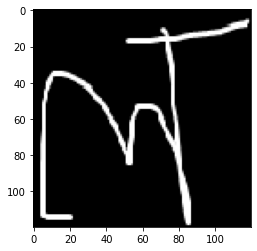

The image is ल




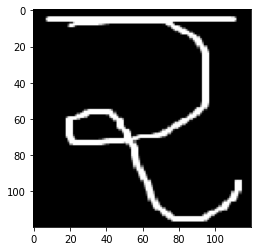

The image is ड़




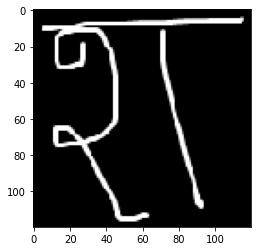

The image is श




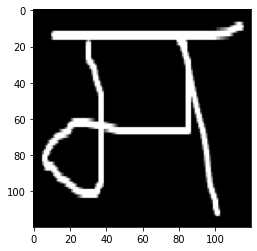

The image is म




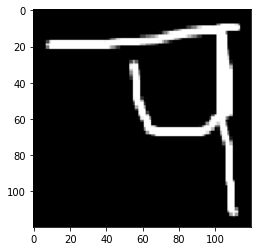

The image is प




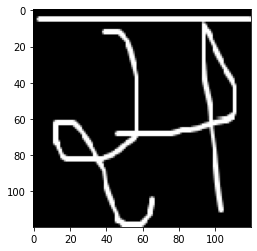

The image is स




In [56]:
# path = r"/content/my test images random"
path = r"/content/test images"
for file in os.listdir(path):

    imgpath = path + "//" + file

    convert(imgpath)
    

    img = image.load_img(r"/content/extracted/final.png", target_size = (120,120,3))
#     print(img.mode)
#     print(img.size)
    plt.imshow(img)
    plt.show()
    img = image.img_to_array(img)

    img = np.reshape(img, (1,120,120,3))

    ypred = model.predict(img)
#         print(type(ypred))
#     print(ypred.shape)
    predClass = np.argmax(ypred, axis= 1)

    prediction = labels[predClass[0]]

    print("The image is " + prediction)

#     print(predClass)
    print("\n")
#     print(file)